In [4]:
%pip install nltk

%pip install spacy
!python -m spacy download es_core_news_sm



Note: you may need to restart the kernel to use updated packages.


  Using cached spacy-3.8.7-cp311-cp311-win_amd64.whl (14.9 MB)
  Using cached murmurhash-1.0.13-cp311-cp311-win_amd64.whl (24 kB)
  Using cached preshed-3.0.10-cp311-cp311-win_amd64.whl (117 kB)
  Using cached thinc-8.3.6-cp311-cp311-win_amd64.whl (1.8 MB)
  Using cached srsly-2.5.1-cp311-cp311-win_amd64.whl (632 kB)
  Using cached catalogue-2.0.10-py3-none-any.whl (17 kB)
  Using cached weasel-0.4.1-py3-none-any.whl (50 kB)
  Using cached typer-0.19.2-py3-none-any.whl (46 kB)
  Using cached pydantic-2.12.0-py3-none-any.whl (459 kB)
  Using cached langcodes-3.5.0-py3-none-any.whl (182 kB)
  Using cached language_data-1.3.0-py3-none-any.whl (5.4 MB)
  Using cached annotated_types-0.7.0-py3-none-any.whl (13 kB)
  Using cached blis-1.3.0-cp311-cp311-win_amd64.whl (6.2 MB)
  Using cached confection-0.1.5-py3-none-any.whl (35 kB)
  Using cached rich-14.2.0-py3-none-any.whl (243 kB)
  Using cached cloudpathlib-0.23.0-py3-none-any.whl (62 kB)
  Using cached marisa_trie-1.3.1-cp311-cp311-win_a

     --------------------------------------- 12.9/12.9 MB 28.5 MB/s eta 0:00:00
✔ Download and installation successful
You can now load the package via spacy.load('es_core_news_sm')


In [6]:
%pip install wordcloud

     -------------------------------------- 299.9/299.9 kB 9.3 MB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.


In [1]:
import pandas as pd
# import nltk
# import re
# import unicodedata
# import spacy
# import numpy as np
# import langid
# from wordcloud import WordCloud
# from sklearn.feature_extraction.text import TfidfVectorizer
# from sklearn.cluster import MiniBatchKMeans
# from collections import Counter
# import matplotlib.pyplot as plt
# from sklearn.decomposition import TruncatedSVD
# #from transformers import pipeline, AutoTokenizer, AutoModelForSequenceClassification
# import logging
# logging.basicConfig(level=logging.INFO)

In [ ]:
# for model_name in [
#     "facebook/bart-large-mnli",        # para stance pro-ruso/pro-ucraniano
#     "valhalla/distilbart-mnli-12-1"    # para ejes argumentativos
# ]:
#     print(f"Descargando {model_name}…")
#     AutoTokenizer.from_pretrained(model_name)
#     AutoModelForSequenceClassification.from_pretrained(model_name)
# print("✓ Modelos descargados en caché local.")

In [2]:
nltk.download('vader_lexicon')

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\User\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


True

In [3]:
# 2. Carga el analizador
from nltk.sentiment.vader import SentimentIntensityAnalyzer
sia = SentimentIntensityAnalyzer()

In [19]:
df = pd.read_csv("../data/processed/7_final_label.csv")

In [20]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 113583 entries, 0 to 113582
Data columns (total 37 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   comment_id                   113583 non-null  object 
 1   comment                      113583 non-null  object 
 2   comment_text_length          113583 non-null  int64  
 3   user_id                      113583 non-null  object 
 4   user_name                    113583 non-null  object 
 5   comment_time                 113583 non-null  object 
 6   comment_likes                113583 non-null  int64  
 7   total_reply_count            113583 non-null  int64  
 8   is_top_level_comment         113583 non-null  bool   
 9   video_title                  113583 non-null  object 
 10  channel_title                113583 non-null  object 
 11  video_published_at           113583 non-null  object 
 12  video_views                  113583 non-null  int64  
 13 

In [4]:
# Colores personalizados
colors = {
    'noticiero': 'grey',
    'pro-ruso': 'red',
    'pro-ucraniano': 'blue'
}

# Detección del idioma

In [ ]:
df["idioma"] = df["comment"].apply(lambda x: langid.classify(str(x))[0])

In [ ]:
df["idioma"].value_counts().head(30)

# Nube de Palabras

In [5]:
# 1) Lista manual de stopwords en español (puedes ampliarla si quieres)
spanish_stopwords = [
    "de","la","que","el","en","y","a","los","del","se","las","por","un","para",
    "con","no","una","su","al","lo","como","más","pero","sus","le","ya","o","este",
    "sí","porque","esta","entre","cuando","muy","sin","sobre","también","me","hasta",
    "hay","donde","quien","desde","todo","nos","durante","todos","uno","les","ni",
    "contra","otros","ese","eso","ante","ellos","e","esto","mí","antes","algunos",
    "qué","unos","yo","otro","otras","otra","él","tanto","esa","estos","mucho",
    "quienes","nada","muchos","cual","poco","ella","estar","estas","algunas","algo",
    "nosotros","mi","mis","tú","te","ti","tu","tus","ellas","nosotras","vosotros",
    "vosotras","os","mío","mía","míos","mías","tuyo","tuya","tuyos","tuyas","suyo",
    "suya","suyos","suyas","nuestro","nuestra","nuestros","nuestras","vuestro",
    "vuestra","vuestros","vuestras","esos","esas", "es", "ser", "fue", "son", "sido", "tiene", "tenido", "tienen", "tenía",
    "tenían", "tendría", "tendrían", "había", "habían", "habrá", "habrán", "habría", "son", "serán", "sería", "serían",
    "está", "están", "estuve", "estuvieron", "estaría", "estarían", "esté", "estén", "estuviera", "estuvieran", 
    "mas", "q", "solo", "tiene", "tienen", "si", "no", "estan", "va", "ha", "vivo", "viva", "ahora", "asi", "aqui", "ahi", 
    "siempre", "nunca", "ya", "sabe", "misma", "tambien", "era", "ve", "dio", "fueron", "toda", "misma", "hacer", "entonces", 
    "iran", "cosa", "dice"
]

In [6]:
# 2) Función para normalizar texto (minúsculas + sin tildes)
def normalize_text(text):
    text = text.lower()
    text = unicodedata.normalize('NFKD', text)
    return ''.join(c for c in text if not unicodedata.combining(c))

In [7]:
# 3) Recolectar y filtrar tokens de todos los comentarios
tokens = []
for txt in df['comment'].astype(str):
    norm = normalize_text(txt)
    toks = re.findall(r"\b\w+\b", norm)
    tokens.extend([t for t in toks if t not in spanish_stopwords])

In [8]:
# 4) Contar frecuencias y tomar top 20
counts = Counter(tokens).most_common(20)
words, freqs = zip(*counts)

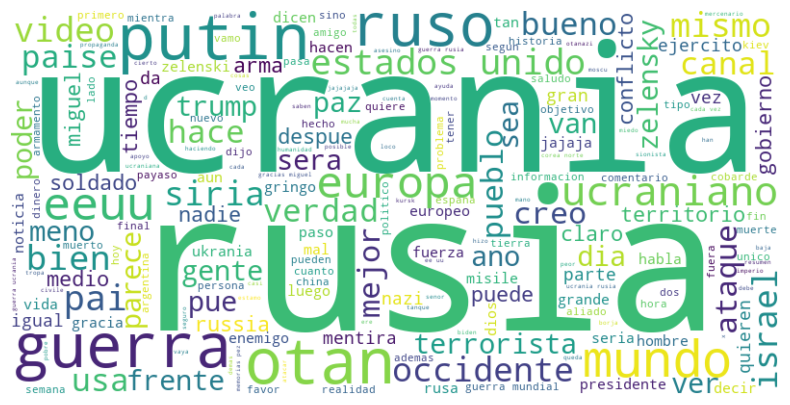

In [9]:
text = " ".join(tokens)
wc = WordCloud(width=800, height=400, background_color="white").generate(text)
plt.figure(figsize=(10,5))
plt.imshow(wc, interpolation="bilinear")
plt.axis("off")
plt.show()

In [10]:
# 1) Extraemos tokens para cada categoría
tokens_noticiero = []
for txt in df[df['condiciones_cuenta']=='noticiero']['comment'].astype(str):
    norm = normalize_text(txt)
    toks = re.findall(r"\b\w+\b", norm)
    tokens_noticiero.extend([t for t in toks if t not in spanish_stopwords])

tokens_proruso = []
for txt in df[df['condiciones_cuenta']=='pro-ruso']['comment'].astype(str):
    norm = normalize_text(txt)
    toks = re.findall(r"\b\w+\b", norm)
    tokens_proruso.extend([t for t in toks if t not in spanish_stopwords])

tokens_proucraniano = []
for txt in df[df['condiciones_cuenta']=='pro-ucraniano']['comment'].astype(str):
    norm = normalize_text(txt)
    toks = re.findall(r"\b\w+\b", norm)
    tokens_proucraniano.extend([t for t in toks if t not in spanish_stopwords])

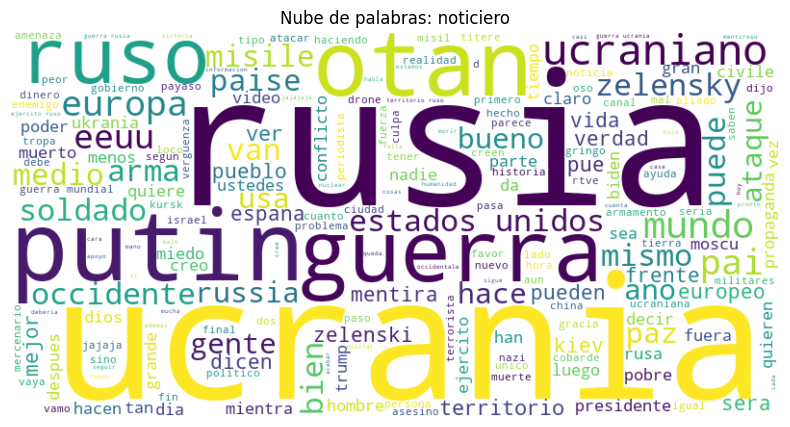

In [11]:
# Nube de palabras para “noticiero”
text_noticiero = " ".join(tokens_noticiero)
wc = WordCloud(width=800, height=400, background_color="white").generate(text_noticiero)
plt.figure(figsize=(10,5))
plt.imshow(wc, interpolation="bilinear")
plt.axis("off")
plt.title("Nube de palabras: noticiero")
plt.show()

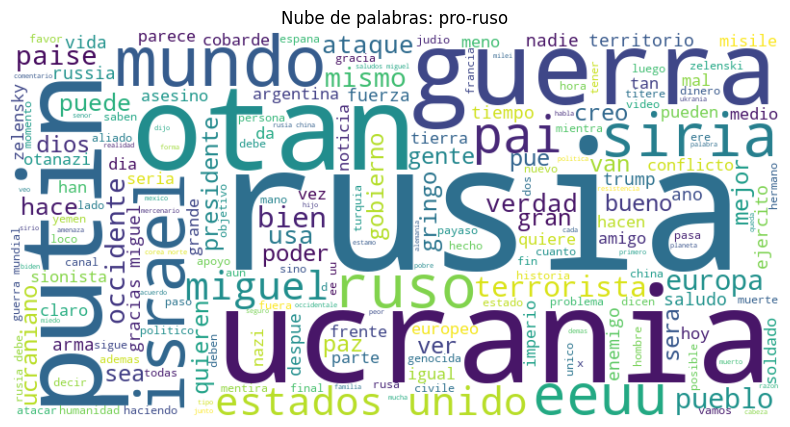

In [12]:
# Nube de palabras para “pro-ruso”
text_proruso = " ".join(tokens_proruso)
wc = WordCloud(width=800, height=400, background_color="white").generate(text_proruso)
plt.figure(figsize=(10,5))
plt.imshow(wc, interpolation="bilinear")
plt.axis("off")
plt.title("Nube de palabras: pro-ruso")
plt.show()

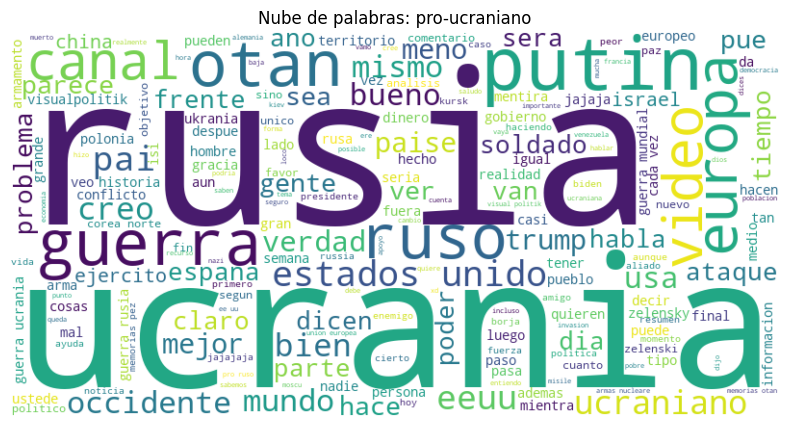

In [13]:
# Nube de palabras para “pro-ucraniano”
text_proucr = " ".join(tokens_proucraniano)
wc = WordCloud(width=800, height=400, background_color="white").generate(text_proucr)
plt.figure(figsize=(10,5))
plt.imshow(wc, interpolation="bilinear")
plt.axis("off")
plt.title("Nube de palabras: pro-ucraniano")
plt.show()

# Classificación -1 a 1 de sentimientos

In [4]:
# 3. Función que mapea a -1, 0, 1 según el 'compound'
def sentiment_label_vader(text, low= -0.05, high=0.05):
    s = sia.polarity_scores(text)['compound']
    if s >= high: return  1
    if s <= low:  return -1
    return 0

In [5]:
df['sentiment'] = df['comment'].astype(str).apply(sentiment_label_vader)

In [6]:
# Conteos absolutos y relativos
counts = df['sentiment'].value_counts().sort_index()
props  = df['sentiment'].value_counts(normalize=True).sort_index() * 100

print("Counts:\n", counts)
print("\nPercentages:\n", props.round(2))


Counts:
 sentiment
-1    34969
 0    72563
 1     6244
Name: count, dtype: int64

Percentages:
 sentiment
-1    30.73
 0    63.78
 1     5.49
Name: proportion, dtype: float64


In [7]:
for s in [-1, 0, 1]:
    print(f"\n=== Clase {s} ===")
    ejemplos = df[df['sentiment']==s]['comment'].sample(5, random_state=42).tolist()
    for c in ejemplos:
        print("-", c)



=== Clase -1 ===
- Miguel 👏👏 estoy impactada 😢😢😢 😞😔 no puedo ni hablar.
- No entiendo nada por el canal prensa alternativa de Juan José del castillo publican que Rusia 🇷🇺 está acabando con los rebeldes los mig 31 y sucoy 35 están bombardeado sin piedad a los extremistas kurdos y por aquí dicen lo contrario así que no entiendo nada
- TU ERES PROCOMUNISMO JAJAJAJAJA YA VI VARIOS DE TUS VIDEOS Y TODOS USTEDES HACEN POSTURAS DE CONDOLENCIAS A GOBERNANTES COMUNISTAS, POBRE Y LAMENTABLE, PERO ESTA ES LA GRAN PRUEBA PARA LA HUMANIDAD EL COMUNISMO!!!!!, AL FINAL ESTO ES UNA BATALLA ESPIRITUAL Y DE UNA VES DE AVISO EL COMUNISMO YA PERDIO Y TU PARECE SER QUE TE INCLINAS POR UN BANDO PERDEDOR!
- No todo van a ser malas noticias para Rusia dice...y si no fuera por la OTAN Ucrania se mea encima y aun así solo esta consiguiendo una mierda bien gorda.
- Estos cretinos no son concientes que están abriendo las puertas del INFIERNO para la humanidad, los ciudadanos europeos deben rechazar este tipo de 

In [8]:
tabla = (
    df
    .groupby(['condiciones_cuenta', 'sentiment'])
    .size()
    .unstack(fill_value=0)
)
print(tabla)

sentiment              -1      0     1
condiciones_cuenta                    
noticiero            7862  17333  1214
pro-ruso            16776  35988  2869
pro-ucraniano       10331  19242  2161


In [9]:
tabla_pct = tabla.div(tabla.sum(axis=1), axis=0).round(3)*100
print(tabla_pct)

sentiment             -1     0    1
condiciones_cuenta                 
noticiero           29.8  65.6  4.6
pro-ruso            30.2  64.7  5.2
pro-ucraniano       32.6  60.6  6.8


# Detección de “postura” (stance) pro-ruso vs pro-ucraniano

In [8]:
# 1) Creamos el pipeline (requiere descargar modelo la 1ª vez)
stance_classifier = pipeline(
    "zero-shot-classification",
    model="valhalla/distilbart-mnli-12-1",
    device=-1,
    batch_size=64,
    local_files_only=True
)

# 2) Etiquetas candidatas
candidate_labels = ["pro-ruso", "pro-ucraniano", "neutral"]

# 3) Función para asignar la etiqueta más probable
def detect_stance(text):
    out = stance_classifier(text, candidate_labels)
    return out["labels"][0]   # el label con mayor score

# 4) Aplica al DataFrame
df["stance"] = df["comment"].astype(str).apply(detect_stance)

Device set to use cpu


KeyboardInterrupt: 

# 2) Detección de insultos / toxicidad


In [13]:
# 1) Función para normalizar (quitar tildes y pasar a minúsculas)
def normalize_text(text):
    text = text.lower()
    # descomponer caracteres Unicode y quitar marcas
    text = unicodedata.normalize('NFKD', text)
    text = ''.join(c for c in text if not unicodedata.combining(c))
    return text

In [14]:
# 1. Un set amplio de insultos comunes en español
insultos = {
    "idiota","imbécil","estúpido","estupida","tonto","tonta","bobo","boba",
    "gilipollas","gilipollas","gilipollas","gilipollas","burro","burra",
    "subnormal","retrasado","retrasada","tarado","tarada","mongólico",
    "mongolica","cretino","cretina","cabron","cabrón","cabrona","cabronazo",
    "pendejo","pendeja","maricón","marica","maricona","coño","joder","mierda",
    "puta","puto","maldito","maldita","malparido","malparida","zorra","perra",
    "prostituta","mamón","mamona","zopenco","zopenca","zángano","zorra","zoquete",
    "gilipuertas","capullo","capulla","troll","idiota","idiotas","inutil", "mentiroso",
    "gil",
    # contexto de guerra
    "traidor","genocida","asesino","criminal","invasor","nazis", "nazi", "ucranazi", "fascista",
    "marioneta","titere","miserable","cobarde","zombie", "rata", "ratas", "ladron",
    "ladrona", "complice", "fascista", "facho", "payaso", "otanazi", "ukronazi","ukrop"

}


In [15]:
# 3) Función para detectar insultos tras normalizar
def has_insulto(text):
    text_norm = normalize_text(text)
    tokens = re.findall(r"\b\w+\b", text_norm)
    return any(tok in insultos for tok in tokens)


In [16]:
# 4) Función para contar insultos
def count_insultos(text):
    text_norm = normalize_text(text)
    tokens = re.findall(r"\b\w+\b", text_norm)
    return sum(tok in insultos for tok in tokens)

In [17]:
# 5) Aplicarlo al DataFrame
df['insulto']   = df['comment'].astype(str).apply(has_insulto)
df['n_insultos'] = df['comment'].astype(str).apply(count_insultos)

In [18]:
# Conteos absolutos y relativos
counts = df['insulto'].value_counts().sort_index()
props  = df['insulto'].value_counts(normalize=True).sort_index() * 100

print("Counts:\n", counts)
print("\nPercentages:\n", props.round(2))

Counts:
 insulto
False    106766
True       6817
Name: count, dtype: int64

Percentages:
 insulto
False    94.0
True      6.0
Name: proportion, dtype: float64


In [19]:
# Exportar el DataFrame con los insultos detectados y las nuevas columnas para la clasificación de pro-ruso/pro-ucraniano

output_path = "../data/processed/3_comments_youtube_with_insults.csv"
df.to_csv(output_path, index=False)

print(f"Dataset limpio guardado en: {output_path}")
print(f"Comentarios únicos: {len(df)}")

Dataset limpio guardado en: ../data/processed/3_comments_youtube_with_insults.csv
Comentarios únicos: 113583


In [ ]:
tabla_insulto = (
    df
    .groupby(['condiciones_cuenta', 'insulto'])
    .size()
    .unstack(fill_value=0)
)
print(tabla_insulto)

In [ ]:
tabla_pct_insulto = tabla_insulto.div(tabla_insulto.sum(axis=1), axis=0).round(3)*100
print(tabla_pct_insulto)

-----------------------

# Test para Agrupar los comentarios k-means

In [35]:
# 2) Carga el pipeline de spaCy
nlp = spacy.load("es_core_news_sm")

In [102]:
# Eliminar emojis de los comentarios 
emoji_pattern = re.compile("["
         u"\U0001F600-\U0001F64F"  # emoticons
         u"\U0001F300-\U0001F5FF"  # símbolos y pictogramas
         u"\U0001F680-\U0001F6FF"  # transporte y mapas
         u"\U0001F1E0-\U0001F1FF"  # banderas (iOS)
         "]+", flags=re.UNICODE)
df['comment_clean'] = df['comment'].astype(str).apply(lambda t: emoji_pattern.sub(r'', t))

In [36]:
# 3) Función de tokenización que spaCy + lematiza y quita stopwords/puntuación
def spacy_tokenizer(text):
    doc = nlp(text)
    return [
        token.lemma_.lower() 
        for token in doc 
        if not token.is_stop 
           and not token.is_punct 
           and token.lemma_.strip()
    ]

In [ ]:
# 4) Vectorizar con ese tokenizer
tfidf = TfidfVectorizer(
    tokenizer=spacy_tokenizer,
    token_pattern=None,
    lowercase=True,
    max_df=0.8,
    min_df=5,
    ngram_range=(1,2)
)
X = tfidf.fit_transform(df['comment_clean'].astype(str))

c:\Users\User\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\feature_extraction\text.py:521: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(


In [38]:
# 5) Clustering ligero
mbk = MiniBatchKMeans(n_clusters=10, batch_size=1000, random_state=42)
df['cluster'] = mbk.fit_predict(X)

In [39]:
# 6) Términos representativos
terms = tfidf.get_feature_names_out()
order_centroids = mbk.cluster_centers_.argsort()[:, ::-1]
for i in range(10):
    top10 = [terms[idx] for idx in order_centroids[i, :10]]
    print(f"Cluster {i}: {', '.join(top10)}")

Cluster 0: ruso, ucraniano, ucrania, baja, rusia, territorio, pro, putin, guerra, pro ruso
Cluster 1: guerra, ganar, ucrania, rusia, ganar guerra, mundial, guerra mundial, perder, ucrania ganar, guerra ucrania
Cluster 2: israel, sirio, terrorista, rusia, ir, siria, iran, eeuu, atacar, pueblo
Cluster 3: ❤, 🇺, 🇷, 🇷 🇺, ❤ ❤, 🇦, 🇺 🇦, 🇺 🇷, ️, ❤ ️
Cluster 4: rusia, ucrania, vivo, otar, vivo rusia, atacar, perder, otan, putin, país
Cluster 5: rusia vencer, vencer, rusia, vivo rusia, vivo, vencer otan, caber duda, ucranazi, caber, régimen
Cluster 6: 😂, 😂 😂, ucrania, rusia, ruso, ganar, 😅, canal, guerra, ucrania 😂
Cluster 7: putin, ucraniano, ucrania, mundo, video, memoria, canal, otan, q, otar
Cluster 8: 😅, 😅 😅, 😢, 😢 😢, 😂, 😅 😂, 😂 😅, rusia, ucrania, ucrania 😅
Cluster 9: miguel, gracias, gracias miguel, saludos, saludo, información, gracias información, excelente, holar miguel, saludos miguel


In [ ]:
for i in range(10):
    print(f"\n— Cluster {i} (top palabras: {order_centroids[i,:5].tolist()})")
    ejemplos = df[df['cluster']==i]['comment_clean'].sample(5, random_state=42)
    for c in ejemplos:
        print(" •", c)



— Cluster 0 (top palabras: [28688, 33482, 32821, 3740, 27823])
 • Rusa avanza en Pokrosv, Selidovy, y Kupian. Gavrilyuk da informe de como Kyiv destruyo el armamento y avance del armamento Ucraniano, y la ventaja y desventaja de ambos lados. Pyongyan manda soldado a asistir a Moscu. Seul entrara a ayudar a Kyiv? Washington ve a soldados Norcoreano como objetivo en Ucrania. Imposible el armamento nuclear en Ucrania.
 • No dijeron q los rusos acabarían con Ucrania en 1 mes???
 • Increíble la cantidad se rusos tropicales que hay llorando JAJAJAJA
 • muchachos aqui les dejo un analisis diferentes de los ataques rusos a ucrania. 
https://youtu.be/odGfN6egiP4?si=cr06XzLP5ROgaGin
 • Hay un matiz de los hechos que se oculta: la parte rusa ha dicho que los Ucranianos no tienen la capacidad para usar los misiles  que disparó contra territorio ruso, sin la participación de operadores gringos y narcopiratas. Esa implicación, y no solo la autorización a Ucrania, es lo que provoca el cambio en el c

In [100]:
# 1) Mapeo manual basado en tus top términos y ejemplos
cluster_names = {
    0: "Análisis de bajas y territorio",
    1: "Ganancias y pérdidas en la guerra",
    2: "Conflictos en Oriente Medio",
    3: "Reacciones emotivas / apoyo simbólico",
    4: "Movimientos de tropas y estrategia",
    5: "Predicciones de victoria rusa",
    6: "Mofa y memes sobre el conflicto",
    7: "Debates sobre OTAN y alianzas",
    8: "Emociones mixtas y críticas a líderes",
    9: "Agradecimientos y saludos al creador"
}


In [108]:
# ¿Cuántos comentarios hay en cada cluster?
print(df['cluster_name'].value_counts().sort_index())


cluster_name
Agradecimientos y saludos al creador      4737
Análisis de bajas y territorio            7816
Conflictos en Oriente Medio               4152
Debates sobre OTAN y alianzas            62745
Emociones mixtas y críticas a líderes     1444
Ganancias y pérdidas en la guerra         9148
Mofa y memes sobre el conflicto           3965
Movimientos de tropas y estrategia       16164
Predicciones de victoria rusa               18
Reacciones emotivas / apoyo simbólico     3587
Name: count, dtype: int64


In [101]:
# 2) Aplicar el nombre al DataFrame
df['cluster_name'] = df['cluster'].map(cluster_names)


In [103]:
tabla_cruce_cuenta_cluster = pd.crosstab(
    df['cluster_name'],
    df['condiciones_cuenta'],
    normalize='index'   # para ver % dentro de cada cluster
).round(3)*100

print(tabla_cruce_cuenta_cluster)


condiciones_cuenta                     noticiero  pro-ruso  pro-ucraniano
cluster_name                                                             
Agradecimientos y saludos al creador         0.9      91.3            7.8
Análisis de bajas y territorio              26.1      32.7           41.2
Conflictos en Oriente Medio                  4.3      90.0            5.7
Debates sobre OTAN y alianzas               23.8      49.8           26.5
Emociones mixtas y críticas a líderes       28.5      40.5           31.0
Ganancias y pérdidas en la guerra           24.4      35.1           40.6
Mofa y memes sobre el conflicto             33.7      27.4           38.9
Movimientos de tropas y estrategia          25.6      43.5           30.9
Predicciones de victoria rusa               27.8      44.4           27.8
Reacciones emotivas / apoyo simbólico       31.0      52.5           16.5


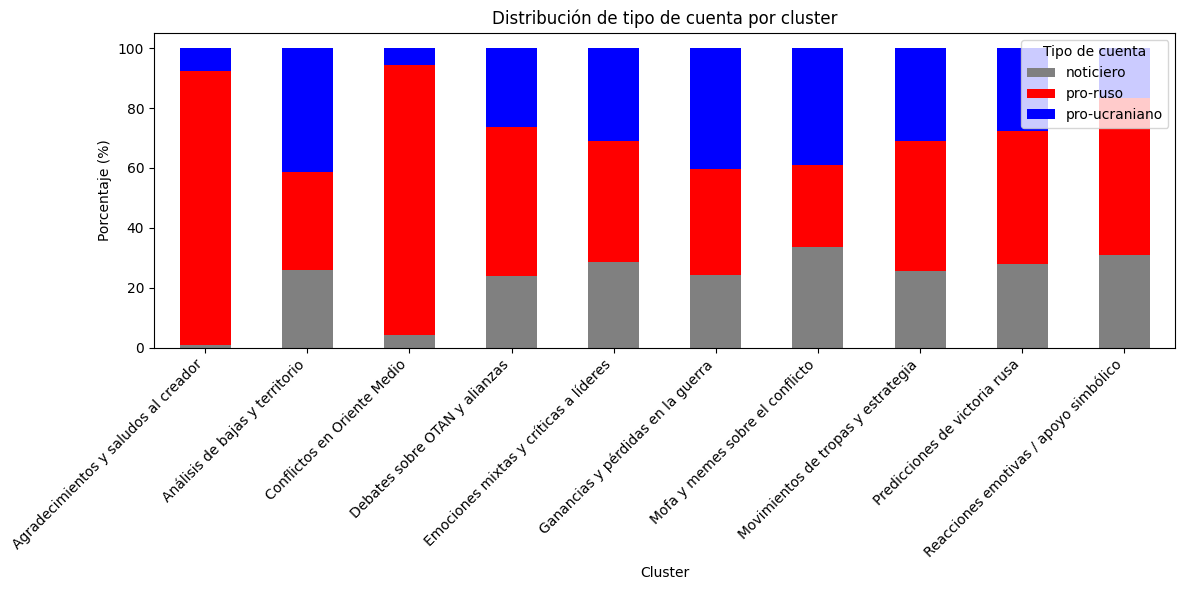

In [105]:
# Gráfico de barras apiladas con rotación de etiquetas
ax = tabla_cruce_cuenta_cluster.plot(
    kind='bar',
    stacked=True,
    color=[colors[col] for col in tabla_cruce_cuenta_cluster.columns],
    figsize=(12, 6)
)

# Rotar etiquetas del eje x para mejor lectura
plt.xticks(rotation=45, ha='right')

plt.xlabel('Cluster')
plt.ylabel('Porcentaje (%)')
plt.title('Distribución de tipo de cuenta por cluster')
plt.legend(title='Tipo de cuenta', loc='upper right')
plt.tight_layout()
plt.show()

# Trolls & Bots

In [110]:
# 1) Detectar posibles trolls/bots por user_id
comment_counts = df['user_id'].value_counts()
troll_threshold = 10  # ajusta según lo que consideres sospechoso
troll_users = comment_counts[comment_counts > troll_threshold].index
df['is_troll'] = df['user_id'].isin(troll_users)

In [111]:
# % de trolls/bots por canal y tipo de cuenta
troll_pct = (
    df
    .groupby(['channel_title','condiciones_cuenta'])['is_troll']
    .mean()
    .unstack(fill_value=0) * 100
)

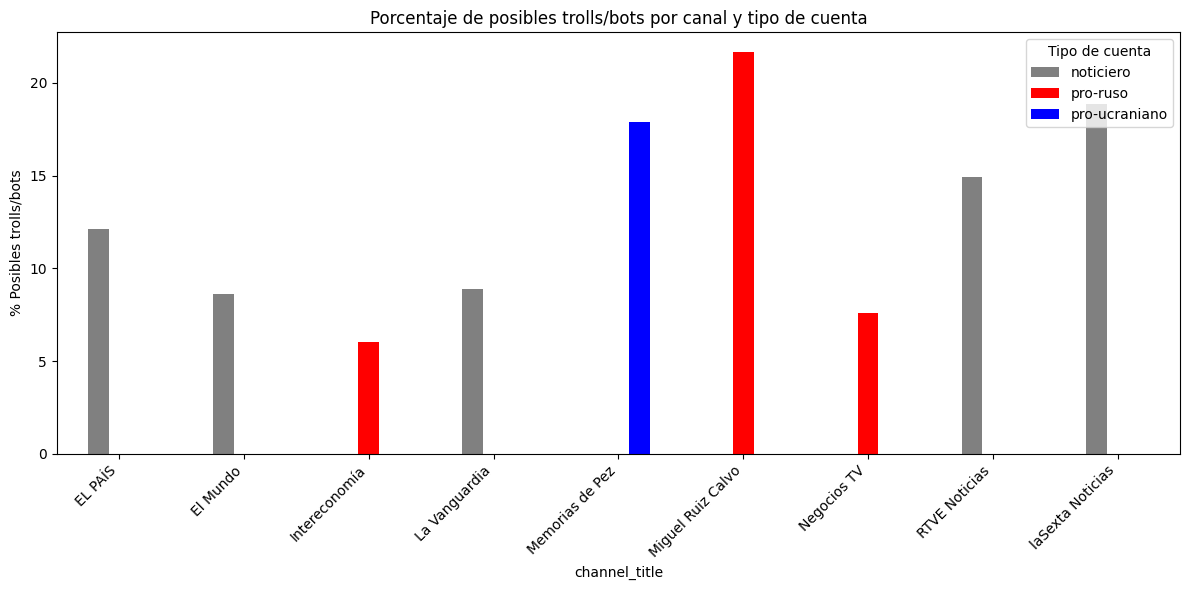

In [113]:
# gráfico de barras agrupadas
ax = troll_pct.plot(
    kind='bar',
    figsize=(12,6),
    color=[colors[c] for c in troll_pct.columns]
)
plt.ylabel('% Posibles trolls/bots')
plt.title('Porcentaje de posibles trolls/bots por canal y tipo de cuenta')
plt.xticks(rotation=45, ha='right')
plt.legend(title='Tipo de cuenta', loc='upper right')
plt.tight_layout()
plt.show()

# Terminos específicos

In [114]:
# 2) Detección de términos clave semánticos
terms_map = {
    'NAFO':        ['nafo'],
    'ucranazi':    ['ucranazi'],
    'AZOV':        ['azov'],
    'Bucha':       ['bucha'],
    'termino_ukr': ['guerra','invasion'],          # pro-ucraniano
    'termino_rus': ['operacion','especial','conflicto']  # pro-ruso
}

In [116]:
def normalize_text(text):
    txt = str(text).lower()
    txt = unicodedata.normalize('NFKD', txt)
    return ''.join(c for c in txt if not unicodedata.combining(c))


In [117]:
for col, kws in terms_map.items():
    df[col] = df['comment'].apply(lambda t: any(kw in normalize_text(t) for kw in kws))

In [118]:
# % de uso de cada término por tipo de cuenta
usage_pct = df.groupby('condiciones_cuenta')[list(terms_map)].mean() * 100

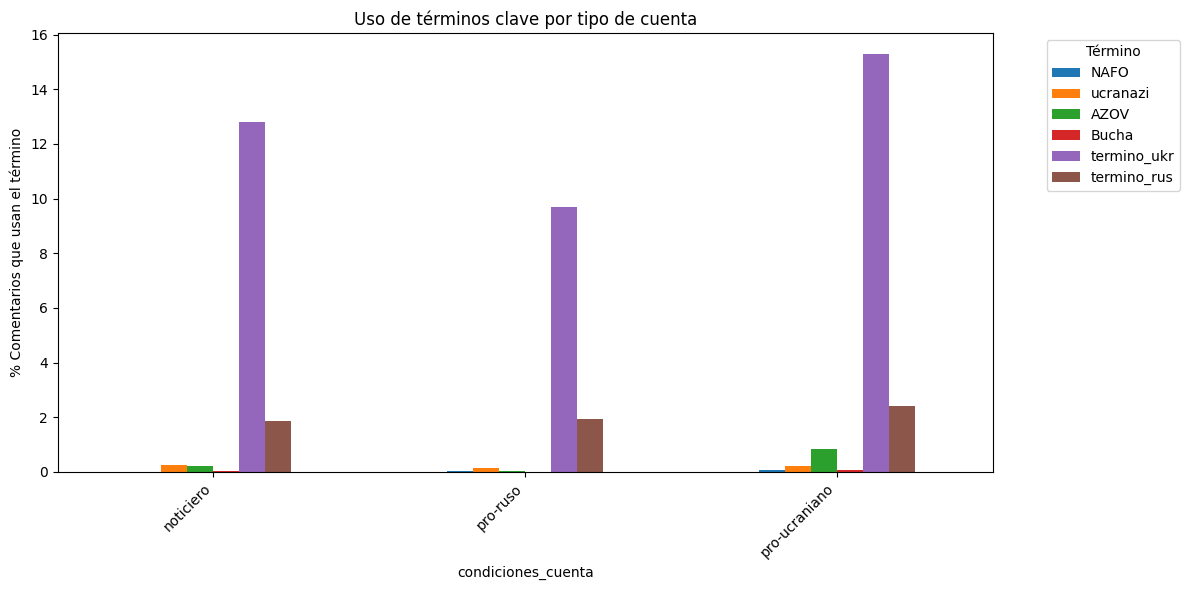

In [119]:
# gráfico de barras agrupadas
usage_pct.plot(
    kind='bar',
    figsize=(12,6),
    color=['#1f77b4','#ff7f0e','#2ca02c','#d62728','#9467bd','#8c564b']
)
plt.ylabel('% Comentarios que usan el término')
plt.title('Uso de términos clave por tipo de cuenta')
plt.xticks(rotation=45, ha='right')
plt.legend(title='Término', bbox_to_anchor=(1.05,1), loc='upper left')
plt.tight_layout()
plt.show()

# Identificación de Emociones

In [124]:
# 2) Detección de emociones con lexicón manual (8 categorías)
emotion_lexicon = {
    'joy':          ['feliz','alegria','contento','genial','gracias','excelente'],
    'anger':        ['rabia','enojo','cabreo','odiar','odio','joder'],
    'sadness':      ['triste','lagrima','dolor','perdida'],
    'fear':         ['miedo','temor','peligro','terror'],
    'surprise':     ['sorpresa','increible','wow'],
    'disgust':      ['asco','repugn','nausea'],
    'trust':        ['confianza','seguro','creer','fiable'],
    'anticipation': ['espera','anticipar','futuro']
}


In [125]:
def detect_emotion_rule(text):
    tokens = set(re.findall(r'\b\w+\b', normalize_text(text)))
    scores = {emo: sum(tok in tokens for tok in kws)
              for emo, kws in emotion_lexicon.items()}
    emo, count = max(scores.items(), key=lambda x: x[1])
    return emo if count > 0 else None

df['emotion'] = df['comment'].apply(detect_emotion_rule)

In [ ]:
print(df['emotion'])

# Ejes argumentativos

In [ ]:
candidate_args = [
    "insultos al creador del video",
    "justificacion historica",
    "culpa de la Otan",
    "culpa de Rusia",
    "defensa de acciones rusas",
    "defensa de acciones ucranianas"
]

In [ ]:
# 3) Ejes argumentativos con zero‐shot (modelo distilado para velocidad)
arg_pipeline = pipeline(
    "zero-shot-classification",
    model="valhalla/distilbart-mnli-12-1",
    device=-1, batch_size=32,
    local_files_only=True
)

In [ ]:

def detect_argument(text):
    out = arg_pipeline(str(text), candidate_args)
    return out['labels'][0]

df['argument_axis'] = df['comment'].apply(detect_argument)


In [ ]:
# 4) Resúmenes rápidos
print("Emociones (%):")
print(df['emotion'].value_counts(normalize=True).mul(100).round(1), "\n")

print("Ejes argumentativos (%):")
print(df['argument_axis'].value_counts(normalize=True).mul(100).round(1))

### Ejes argumentativos con ajustes manuales (más rápido)

In [ ]:
# 2) Palabras clave por eje argumentativo
axes_keywords = {
    "insultos_al_creador": ["canal","video","tú","ustedes"],
    "justificacion_historica": ["historia","historica","historico","urss","segunda guerra mundial","nazi","imperio"],
    "culpa_de_la_otan": ["otan","nato","occidente","eeuu","unidos"],
    "culpa_de_rusia": ["invasor","genocida","masacre","criminal"],
    "defensa_acciones_rusas": ["defender","defensa","victoria","vencer","liberacion","desnazific"],
    "defensa_acciones_ucranianas": ["resistencia","resistir","libertad","justicia","liberar"]
}

In [ ]:
# 3) Prioridad de ejes
priority = [
    "insultos_al_creador",
    "agradecimientos_al_creador",
    "justificacion_historica",
    "neutralidad",
    "festejos_y_memes",
    "poderio_ruso",
    "culpa_de_la_otan_occidente",
    "culpa_de_rusia",
    "defensa_acciones_rusas",
    "defensa_acciones_ucranianas"
]

In [ ]:
# 4) Detector de ejes que usa la columna 'insulto'
def detect_argument_rule(row):
    norm = normalize_text(row['comment'])
    # insultos_al_creador solo si ya marcaste insulto True y referencia al canal/video
    if row.get('insulto', False) and any(kw in norm for kw in axes_keywords["insultos_al_creador"]):
        return "insultos al creador del video"
    # los demás ejes por presencia de keywords en orden
    for axis in priority[1:]:
        for kw in axes_keywords[axis]:
            if kw in norm:
                label_map = {
                    "justificacion_historica": "justificación histórica",
                    "culpa_de_la_otan": "culpa de la OTAN",
                    "culpa_de_rusia": "culpa de Rusia",
                    "defensa_acciones_rusas": "defensa de acciones rusas",
                    "defensa_acciones_ucranianas": "defensa de acciones ucranianas"
                }
                return label_map[axis]
    return "neutral"


In [ ]:
# 5) Aplicar al DataFrame
df['argument_axis'] = df.apply(detect_argument_rule, axis=1)